# Besvara följande teoretiska frågeställning 

### Vad är ”supervised learning”? Kan du ge några exempel på modeller som används och potentiella tillämpningsområden?
Supervised learning är en typ av maskininlärning, vart vi har 'labels' till vårt data, och vi tränar ett model på den här datan, så modellen kan lära sig att prediktera rätt label när det ser en ny datapunkt.\
Exempel: 
- Om jag ger Dig några enkla matematiska uppgifter med lösning, så kommer Du lära Dig/ hitta en strategy eller mönster om hur Du kan lösa uppgifterna, så när jag ger Dig nya uppgifter på samma typ, Du skulle kunna lösa dom.
- Många av IQ tester använder det samma princip; man får några bilder/siffror som följer något mönster, och sista bilden / siffran ska man prediktera själv, baserat på mönstret man har hittat i fregående exemplar.

Det finns många olika algoritmer som är lämpliga att hitta mönster i datan, som exempel (icke uttömmande lista):
- Linear Regression
- Logistisk Regression
- Support Vector Machines
- Decision Trees

Beroende på vilken typ av problem vi har, här är några tillämpningsområden för supervised learning:

__Regression (att prediktera kontinuerlig värde):__
- Prediktera marknadspris för en bostad
- Prediktera företagets intäkter
- Prediktera kötid

__Klassifikation (att prediktera en klass / diskret värde):__
- Prediktera om en tumor är skadlig eller inte
- Prediktera en banktransaktion är bedrägligt
- Prediktera om vilken objekt vi ser på en bild



### Vad är RMSE?

RMSE står för Root Mean Squared Error.\
Det är en standard utvärderingsmetrik för regressionsproblemer, och mäter prediktionernas medelavstånd från det äkta, observerade värden.

Matekatiska formeln för RMSE är:

$RMSE = \sqrt{\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2}$

Idén av RMSE är simpel:
- Man tar skillnaden mellan en prediktion och respektive observerad värde: $\hat{y}_i-y_i$;    Det kallas för __Error__.
- Eftersom skillnaden kan vara negativ, vi kvadrerar Errorn: $(\hat{y}_i-y_i)^2$;   Det kallas för __Squared Error__.
- Vi räknar ut medelvärdet för Squared Error: vi summan av alla Squared Error, och dividerar med antal observationer: $\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2$;    Det kallas för __Mean Squared Error__.
- Vi tar roten ur Mean Squared Error, så siffran är på det samma skala som datan och därför lättare att tolka: $\sqrt{\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2}$

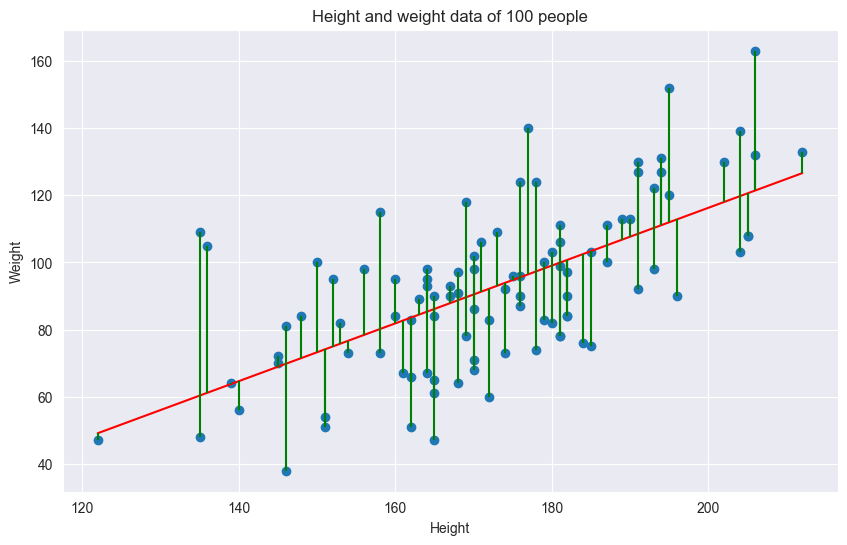

In [234]:
# Visuell exempel till RMSE:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr 
np.random.seed(42)
from sklearn.linear_model import LinearRegression

height = np.random.normal(loc=175, scale=20, size=100).astype('int')
weight = height - 100 + np.random.normal(loc=20, scale=20, size=100).astype('int')
lr = LinearRegression()
lr.fit(height.reshape(-1,1), weight)

fig = plt.figure(figsize=(10,6))
X_min = height.min()
X_max = height.max()
y_min = lr.predict(np.array(height.min()).reshape(-1,1))
y_max = lr.predict(np.array(height.max()).reshape(-1,1))

y_predline = lr.predict(height.reshape(-1,1))

plt.scatter(height, weight)
plt.plot([X_min, X_max], [y_min, y_max], color='r')
plt.vlines(height, weight, y_predline, color='g')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and weight data of 100 people')
plt.savefig('error_fitted_dataset.jpg', bbox_inches='tight')
plt.show()

Röda linjen kallas för Linjär Regressionslinje, "Line of best fit", och det är linjen som minimerar RMSE, dvs. detta är den rak linje som är närmast till alla punkter samtidigt.\
Individuella Error visas med gröna linjerna, medans observerade datapunkter är det blåa punkter.

# Skapa en modell för att prediktera MNIST datasetet

1. Importing dependencies
2. Loading in data
3. EDA
    - 3.1. Exploring dataset info
    - 3.2. Description of the dataset
    - 3.3. Other details of the dataset
    - 3.4. Shape of the dataset
    - 3.5. The labels in the dataset
    - 3.6. Count and percentage of each unique value in the dataset
    - 3.7. Min/Max values in the dataset, and the type of data
4. Example images
5. Splitting datasets
    - 5.1. Splitting datasets
    - 5.2. Checking if the datasets are stratified 
6. Preprocessing
    - 6.1. Scaling the data6.2. Creating a mini batch for faster training
    - 6.2. Creating a mini batch for faster training
7. Model selection:
    - 7.1 Vanilla model testing
    - 7.2 Tuning the models
        - 7.2.1. SVClassifier
        - 7.2.2. XGBClassifier
        - 7.2.3. SGDClassifier
        - 7.2.4. RandomForestClassifier
        - 7.2.5. LogisticRegression
    - 7.3. Summary of tuned models
8. Validation
9. Ensemble models
    - 9.1. Voting Classifier
    - 9.2. Voting Classifier (AutoML)
10. Model testing on test set
11. Final results

## 1. Importing dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import uniform
import random
from sklearn.datasets import fetch_openml
import time

## 2. Loading in dataset

In [244]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## 3. EDA of dataset

__3.1. Exploring the dataset info__

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

__3.2. Description of the dataset__

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

__3.3. Other details of the dataset__

In [5]:
for k, v in mnist.details.items():  # dct.iteritems() in Python 2
    print(f"{k}: {v}")

id: 554
name: mnist_784
version: 1
description_version: 1
format: ARFF
creator: ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges']
upload_date: 2014-09-29T03:28:38
language: English
licence: Public
url: https://api.openml.org/data/v1/download/52667/mnist_784.arff
parquet_url: http://openml1.win.tue.nl/dataset554/dataset_554.pq
file_id: 52667
default_target_attribute: class
tag: ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision']
visibility: public
minio_url: http://openml1.win.tue.nl/dataset554/dataset_554.pq
status: active
processing_date: 2020-11-20 20:12:09
md5_checksum: 0298d579eb1b86163de7723944c7e495


__3.4. Shape of the dataset__

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


__3.5. The labels in the dataset__

In [235]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


__3.6. Count and percentage of each unique value in the dataset__

Counts of each number:
 {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}

Percentage of each number in the dataset:
 {0: 9.861, 1: 11.253, 2: 9.986, 3: 10.201, 4: 9.749, 5: 9.019, 6: 9.823, 7: 10.419, 8: 9.75, 9: 9.94}


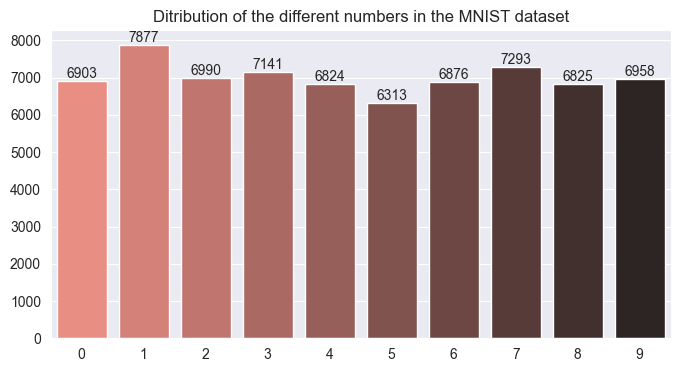

In [7]:
nums_tot, counts_tot = np.unique(y, return_counts=True)
counts_tot_perc = np.around(counts_tot/len(y)*100, 3)
print(f'Counts of each number:\n {dict(zip(np.unique(y),counts_tot))}', end='\n\n')
print(f'Percentage of each number in the dataset:\n {dict(zip(np.unique(y),counts_tot_perc))}')

fig, ax = plt.subplots(figsize=(8, 4))
bins = np.arange(11) - 0.5
sns.barplot(x=nums_tot, y=counts_tot, palette="dark:salmon_r", ax=ax)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')
plt.title('Ditribution of the different numbers in the MNIST dataset')
plt.show()

__3.7. Min/Max values in the dataset, and the type of data__

In [8]:
print(f'Minimum and maximum value in the data (X): {X.min()} / {X.max()}', end='\n\n')
print(f'Type of the data in X: {X.dtype}')

Minimum and maximum value in the data (X): 0.0 / 255.0

Type of the data in X: float64


# 4. Example images

In [9]:
import sys
image = X[0]
image_matrix = image.reshape((28, 28))
np.savetxt(sys.stdout, image_matrix, fmt='%-3.0f')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0  
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0  
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0  
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   0   0   

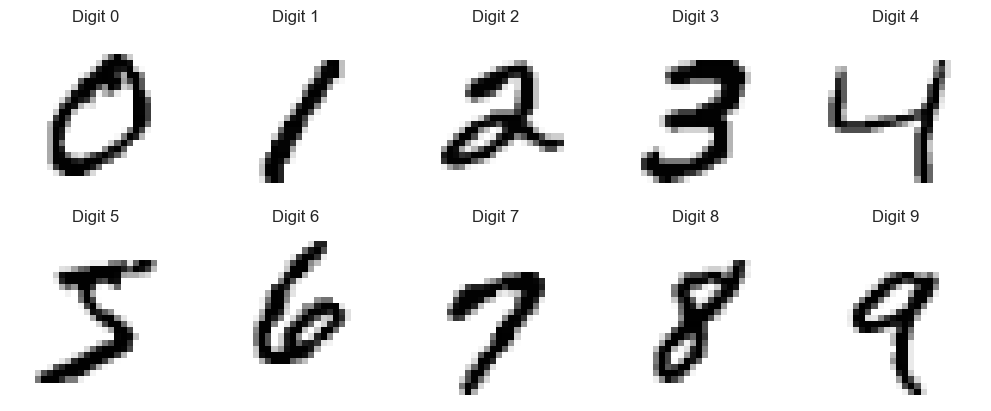

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), layout='constrained')
for i in range(10):
    index = list(mnist.target).index(str(i))
    image = mnist.data[index].reshape(28, 28)
    ax[i // 5, i % 5].imshow(image, cmap='gray_r')
    ax[i // 5, i % 5].set_title(f"Digit {i}")
    ax[i // 5, i % 5].grid(False)
    ax[i // 5, i % 5].tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.show()

# 5. Splitting the whole dataset to training-; validation-; test dataset

__5.1. Splitting datasets__

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [246]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=4000, shuffle=True, random_state=42, stratify=y_test)

In [247]:
sets = [X_train, y_train, X_test, y_test, X_val, y_val]
sets_name = ['X_train', 'y_train', 'X_test', 'y_test', 'X_val', 'y_val']

for name, s in zip(sets_name, sets):
    print(f'{name} shape: {s.shape}')

X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
X_val shape: (4000, 784)
y_val shape: (4000,)


__5.2. Checking if the datasets are stratified (each group/number is represented the same way)__

In [159]:
nums_train, counts_train = np.unique(y_train, return_counts=True)
counts_train_perc = np.around(counts_train/len(y_train)*100, 3)

nums_val, counts_val = np.unique(y_val, return_counts=True)
counts_val_perc = np.around(counts_val/len(y_val)*100, 3)

nums_test, counts_test = np.unique(y_test, return_counts=True)
counts_test_perc = np.around(counts_test/len(y_test)*100, 3)

In [236]:
pd.DataFrame(columns=list(range(10)), index=['Train set', 'Validation set', 'Test set'],\
             data= [counts_train_perc, counts_val_perc, counts_test_perc])

,0,1,2,3,4,5,6,7,8,9
Train set,9.861,11.254,9.986,10.202,9.748,9.018,9.823,10.418,9.75,9.941
Validation set,9.875,11.250,9.975,10.200,9.750,9.025,9.825,10.425,9.75,9.925
Test set,9.860,11.250,9.990,10.200,9.750,9.020,9.820,10.420,9.75,9.940


Precentage of number distribution

__All the sets seem to have very similar representation of the groups__

# 6. Preprocessing

### 6.1. Scaling the data

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [249]:
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [250]:
print(f'''Training set after scaling:
- Mean: {X_train.mean()}
- Std: {X_train.std()}
- Min: {X_train.min()}
- Max: {X_train.max()}'''
     )

Training set after scaling:
- Mean: 2.589441456851677e-21
- Std: 0.956982929069586
- Min: -1.2813727009821232
- Max: 236.64107842929266


I am a bit suspicious about these results. Because the dataset is highly unbalanced regarding to pixel values the StandardScaler returns an unexpecdedly high max value for the dataset (Max: 236.64107842891516).\
This could be due to the fact that an overwhelming majority of the pixels has a value of 0, and only a small fraction has values above ~250, which makes the dataset full of extremes.\
StandardScaler works best when a datasets values (more or less) follow a Normal Gaussian distribution, which is not the case here.\
Considering MinMax- or RobustScaler could be worth

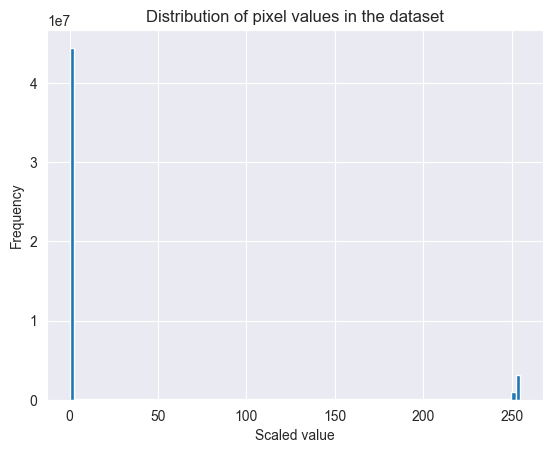

In [237]:
plt.hist(X.flatten(), bins=100)
plt.xlabel('Scaled value')
plt.ylabel('Frequency')
plt.title('Distribution of pixel values in the dataset')
plt.show()

### 6.2. Creating a mini batch for faster training

In [251]:
mini = 4000
X_train_mini = X_train[:mini]
y_train_mini = y_train[:mini]

In [252]:
nums_train_mini, counts_train_mini = np.unique(y_train_mini, return_counts=True)
counts_train_perc_mini = np.around(counts_train_mini/len(y_train_mini)*100, 3)

__Checking if the mini batch is stratified__

In [253]:
strat_df_mini = pd.DataFrame(data=[counts_tot_perc, counts_train_perc_mini], columns=[n for n in range(0,10)],\
                        index=['Original set', 'Mini set'])
strat_df_mini

,0,1,2,3,4,5,6,7,8,9
Original set,9.861,11.253,9.986,10.201,9.749,9.019,9.823,10.419,9.750,9.940
Mini set,10.150,10.875,9.850,10.350,9.800,9.375,9.925,10.225,9.575,9.875


For training purposes, each of the categories are sufficiently represented

# 7. Model selection

In [254]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# 7.1 Vanilla model testing

In [27]:
clf_log = LogisticRegression(n_jobs=-1)
clf_SGD = SGDClassifier(n_jobs=-1)
clf_SVC = SVC()
clf_tree = DecisionTreeClassifier()
clf_rf = RandomForestClassifier(n_jobs=-1)
clf_xgb = xgb.XGBClassifier()

models = [clf_log, clf_SGD, clf_SVC, clf_tree, clf_rf, clf_xgb]
model_names = ['LogisticRegression', 'SGDClassifier', 'SVClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

__Scores for each vanilla model__ (accuracy score)

In [28]:
score_dict_vanilla = {}

for model in models:
    start_time = time.time()
    score = cross_val_score(model, X=X_train_mini, y=y_train_mini, cv=5, scoring='accuracy')
    end_time = time.time()
    elapsed_time = end_time - start_time
    score_dict_vanilla[str(model)] = np.append(np.mean(score), elapsed_time)

In [29]:
pd.DataFrame(data=score_dict_vanilla.values(), index=model_names, columns=['Mean CV score', 'Training time']).\
sort_values('Mean CV score', ascending=False)

,Mean CV score,Training time
XGBClassifier,0.92825,31.730554
RandomForestClassifier,0.92825,1.894114
SVClassifier,0.91975,7.110456
LogisticRegression,0.88675,9.303742
SGDClassifier,0.88250,2.918207
DecisionTreeClassifier,0.75275,1.907013


Because the single DecisionTreeClassifier performed so poorly, and because we are using a RandomForestClassifier, I decided to exclude the DecisionTreeClassifier model from the following sections.


Let's now try and optimize each model

# 7.2 Tuning the models

In [239]:
tuned_cv_scores = {}

In [273]:
def model_checker(model, model_name):
    """A function that makes a 5-fold Cross Validation (CV) on the mini batch training dataset
    when passed a model and the models name.
    
    The function returns the CV scores for each fold on the model, and besides that
    it will add the mean CV score to the tuned_cv_scores dictionary, together with the
    time in seconds the 5 fold CV took.
    
    Arguments:
    model - an estimator to do the CV on
    model_name - a string with the models name"""
    
    start_time = time.time()
    
    model_score = cross_val_score(model, X=X_train_mini, y=y_train_mini, cv=5, scoring='accuracy')
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    tuned_cv_scores[model_name] = np.append(np.mean(model_score), elapsed_time)
#     cv_scores = pd.DataFrame(data=model_score, index=list(range(1,6)), columns=[f'CV score {model_name}'])
#     cv_scores.loc['Mean'] = np.mean(model_score)
#     cv_scores.loc['Elapsed time (CV=5, X_train_mini)'] = np.mean(elapsed_time)
#     display(cv_scores)
    return model_score

In [255]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### 7.2.1. SVClassifier

Since the full exhaustive GridSearch takes very long time, i decided to do a RandomizedSearchCV instead.\
Having said this, the hyperparameters used for the model are taken from another search from a previous notebook, but i left in the code for convenience.

In [51]:
# To see all available hyperparameters
# SVC().get_params()

In [52]:
param_grid = {'tol':[0.00001, 0.0001, 0.001,0.01,1], 
              'C': [0.0001, 0.001, 0.01,0.1,1,10], 
              'kernel':['poly', 'rbf'],
              'degree':[2,3], 
              'gamma':['scale','auto', 0.1, 1, 5, 10]}

svc_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_grid, n_jobs=-1, refit=True,\
                                cv=kf, scoring='accuracy', return_train_score=True, n_iter=25)
svc_search.fit(X_train_mini, y_train_mini)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(random_state=42), n_iter=25, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                                        'degree': [2, 3],
                                        'gamma': ['scale', 'auto', 0.1, 1, 5,
                                                  10],
                                        'kernel': ['poly', 'rbf'],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01, 1]},
                   return_train_score=True, scoring='accuracy')

In [92]:
# svc_search.best_params_

In [257]:
# Hyperparameters taken from another Gridsearch from a previous notebook
svc_model = SVC(C=0.01, degree=2, gamma=10, kernel='poly', random_state=42, tol=1e-05)

In [55]:
svc_score = model_checker(svc_model, 'SVC')

### 7.2.2. XGBClassifier

The XGBoost model took a very long time to fit, even when conducting a HalvingGridSearch, it never got to the end of the search.\
In the end I will use the vanilla model, without any hyperparameter tuning.

In [79]:
# To see all available hyperparameters
# xgb.XGBClassifier().fit

In [258]:
xgb_model = xgb.XGBClassifier()

In [57]:
xgb_score = model_checker(xgb_model, 'XGB Classifier')

### 7.2.3. SGDClassifier

In [60]:
# To see all available hyperparameters
# SGDClassifier().get_params()

In [404]:
param_grid = [{
    'loss': ['hinge'],
    'penalty':['l2'],
    'alpha':np.linspace(0.0003, 0.001, 5),
    'learning_rate':['optimal']
}]

sgdc_search = GridSearchCV(SGDClassifier(n_jobs=-1, random_state=42), param_grid=param_grid, n_jobs=-1, refit=True, cv=kf, scoring='accuracy', return_train_score=True)
sgdc_search.fit(X_train_mini, y_train_mini)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDClassifier(n_jobs=-1, random_state=42), n_jobs=-1,
             param_grid=[{'alpha': array([0.0003  , 0.000475, 0.00065 , 0.000825, 0.001   ]),
                          'learning_rate': ['optimal'], 'loss': ['hinge'],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='accuracy')

In [270]:
# sgdc_search.best_params_

In [259]:
sgdc_model = SGDClassifier(alpha=0.000475, learning_rate= 'optimal', loss= 'hinge', penalty= 'l2')

In [59]:
sgdc_score = model_checker(sgdc_model, 'SGDClassifier')

### 7.2.4. RandomForestClassifier

In [408]:
# To see all available hyperparameters
# RandomForestClassifier().get_params()

In [409]:
param_grid = [{
    'max_depth': [16],
    'max_leaf_nodes': [290],
    'min_impurity_decrease': [0.001],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100]}]

rfc_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, n_jobs=-1,\
                          refit=True, cv=kf, scoring='accuracy', return_train_score=True)
rfc_search.fit(X_train_mini, y_train_mini)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [16], 'max_leaf_nodes': [290],
                          'min_impurity_decrease': [0.001],
                          'min_samples_leaf': [1], 'min_samples_split': [2],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='accuracy')

In [90]:
# rfc_search.best_params_

In [260]:
rfc_model = RandomForestClassifier(max_depth= 16, max_leaf_nodes= 290, min_impurity_decrease= 0.001,\
                                   min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)

In [61]:
rfc_score = model_checker(rfc_model, 'RandomForestClassifier')

### 7.2.5. LogisticRegression

In [413]:
# To see all available hyperparameters
# LogisticRegression().get_params()

In [414]:
param_grid = [{
    'C': [1],
    'l1_ratio': [0.001, 0.01],
    'max_iter': [100],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'tol': [0.0001],
    'warm_start': [True]
}]

lr_search = GridSearchCV(LogisticRegression(random_state=42), param_grid=param_grid, n_jobs=-1, refit=True, cv=kf,\
                         scoring='accuracy', return_train_score=True)
lr_search.fit(X_train_mini, y_train_mini)

C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [1], 'l1_ratio': [0.001, 0.01],
                          'max_iter': [100], 'penalty': ['elasticnet'],
                          'solver': ['saga'], 'tol': [0.0001],
                          'warm_start': [True]}],
             return_train_score=True, scoring='accuracy')

In [94]:
# lr_search.best_params_

In [261]:
lr_model = LogisticRegression(C= 1, l1_ratio= 0.001, max_iter= 100, penalty= 'elasticnet', solver= 'saga', \
                              tol= 0.0001, warm_start= True)

In [63]:
lr_score = model_checker(lr_model, 'LogisticRegression')

C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 7.3. Summary of tuned models

### Vanilla model CV socres

In [64]:
pd.DataFrame(data=score_dict_vanilla.values(), index=model_names, columns=['Mean CV score', 'Training time']).\
sort_values('Mean CV score', ascending=False)

,Mean CV score,Training time
XGBClassifier,0.92825,31.730554
RandomForestClassifier,0.92825,1.894114
SVClassifier,0.91975,7.110456
LogisticRegression,0.88675,9.303742
SGDClassifier,0.88250,2.918207
DecisionTreeClassifier,0.75275,1.907013


### Tuned model CV scores

In [65]:
pd.DataFrame(data=tuned_cv_scores.values(), index=tuned_cv_scores.keys(),\
             columns=['Mean CV score', 'Training time']).sort_values('Mean CV score', ascending=False)

,Mean CV score,Training time
SVC,0.93100,5.705364
XGB Classifier,0.92825,31.575547
RandomForestClassifier,0.92250,6.184400
LogisticRegression,0.89300,83.039169
SGDClassifier,0.88525,12.199203


__As__ we can see, most of the models had a slightly improved mean CV score.\
Because the same XGBoost default model was used as "tuned" and vanilla model, and we defined a random_state for the KFold, the CV score is the same.

[]

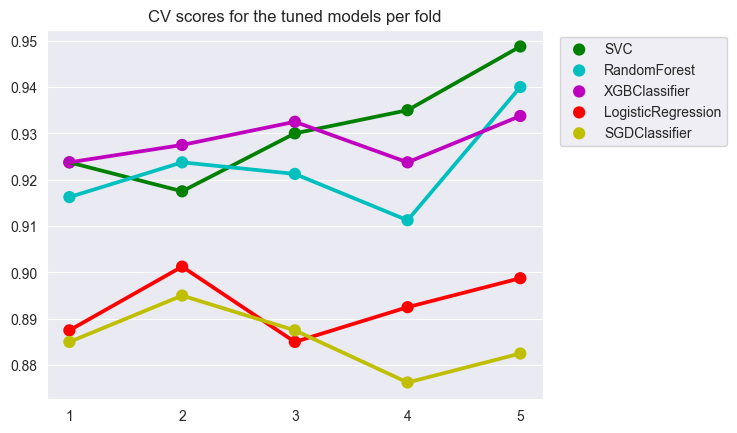

In [240]:
# sns.pointplot(data=tuned_models, x=list(range(1,6)), y=svc_score, label='SVC', color='g')
sns.pointplot(x=list(range(1,6)), y=svc_score, label='SVC', color='g')
sns.pointplot(x=list(range(1,6)), y=rfc_score, label='RandomForest', color='c')
sns.pointplot(x=list(range(1,6)), y=xgb_score, label='XGBClassifier', color='m')
sns.pointplot(x=list(range(1,6)), y=lr_score, label='LogisticRegression', color='r')
sns.pointplot(x=list(range(1,6)), y=sgdc_score, label='SGDClassifier', color='y')
plt.title('CV scores for the tuned models per fold')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.plot()

# 8. Validation

In [263]:
score_dict_val = {}
models_for_val = [xgb_model, svc_model, sgdc_model, rfc_model, lr_model]
models_for_val_name = ['xgb', 'svc', 'sgdc', 'rfc', 'lr']

for n, model in enumerate(models_for_val):  
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    elapsed_fit_time = end_time - start_time
    start_time = time.time()
    y_pred = model.predict(X_val)
    end_time = time.time()
    elapsed_pred_time = end_time - start_time
    model_score = accuracy_score(y_val, y_pred)
    print('=================================================')
    print(f'===Classification report for {models_for_val_name[n]} model ===')
    print(classification_report(y_val, y_pred))
    print('=================================================', end='\n\n')
    score_dict_val[models_for_val_name[n]] = [model_score, elapsed_fit_time, elapsed_pred_time]

===Classification report for xgb model ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.99      0.99       450
           2       0.98      0.98      0.98       399
           3       0.98      0.97      0.98       408
           4       0.97      0.97      0.97       390
           5       0.99      0.98      0.98       361
           6       0.97      0.99      0.98       393
           7       0.98      0.98      0.98       417
           8       0.98      0.98      0.98       390
           9       0.96      0.96      0.96       397

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000


===Classification report for svc model ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       395
           1       0.99      0.99      0.99  

C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [264]:
val_acc_scores = pd.DataFrame(index=score_dict_val.keys(), data= score_dict_val.values(), columns=\
    ['Validation accuracy score', 'Fit time', 'Prediction time']).sort_values('Validation accuracy score', ascending=False)
val_acc_scores

,Validation accuracy score,Fit time,Prediction time
xgb,0.97950,137.590286,0.025006
svc,0.97675,153.368442,12.356203
lr,0.92175,294.094480,0.007003
sgdc,0.91600,96.086276,0.006001
rfc,0.91500,18.376564,0.075016


# 9. Ensemble models

### 9.1. Voting Classifier (using the previous 5 models)

In [265]:
voting_estimators = list(zip(models_for_val_name, models_for_val))

In [266]:
# Initializing and fitting (with timing)
voting_clf = VotingClassifier(
    estimators=voting_estimators, voting='hard'
)
start_time = time.time()
voting_clf.fit(X_train, y_train)
end_time = time.time()
elapsed_fit_time_voting = end_time - start_time

C:\Users\marke\anaconda3\envs\kurs5\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [267]:
# Predicting (with timing)
start_time = time.time()
y_pred_voting = voting_clf.predict(X_val)
end_time = time.time()
elapsed_pred_time_voting = end_time - start_time

In [268]:
val_acc_scores.loc['voting_clf'] = [accuracy_score(y_val, y_pred_voting), elapsed_fit_time_voting, elapsed_pred_time_voting]
val_acc_scores

,Validation accuracy score,Fit time,Prediction time
xgb,0.97950,137.590286,0.025006
svc,0.97675,153.368442,12.356203
lr,0.92175,294.094480,0.007003
sgdc,0.91600,96.086276,0.006001
rfc,0.91500,18.376564,0.075016
voting_clf,0.95575,707.136676,12.563415


### 9.2. Ensemble model (based on autosklearn)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# The model names, weights and model initialized
autosklearn_esimator_names = ['libsvm_svc1', 'libsvm_svc2', 'k_nearest_neighbors', 'random_forest', 'libsvm_svc3']
autosklearn_esimator_weights = [0.12, 0.02, 0.14, 0.64, 0.08]
autosklearn_esimator_models = [
    
    SVC(C=12923.91167672086, cache_size=1239.6901041666667, gamma=0.028106748647672205, max_iter=-1, random_state=1,\
        shrinking=False, tol=2.0706197108771777e-05),
    
    SVC(C=21.59109048521139, cache_size=1267.9713541666667, class_weight='balanced', gamma=5.060493057005212,\
        max_iter=-1, random_state=1, shrinking=False, tol=0.00012027336497045934),
    
    KNeighborsClassifier(n_neighbors=4, weights='distance'),
    
    RandomForestClassifier(max_features=25, n_estimators=512, n_jobs=1, random_state=1, warm_start=True),
    
    SVC(C=8776.614453785322, cache_size=1239.6640625, coef0=-0.33548507886436374, degree=2, gamma=2.6166845238639262, \
        kernel='poly', max_iter=-1, random_state=1, shrinking=False, tol=4.6482002538704e-05)
]
autosklearn_esimators = list(zip(autosklearn_esimator_names, autosklearn_esimator_models))

In [85]:
# Initialize VotingClassifier
auto_sklearn_voting = VotingClassifier(
    estimators = autosklearn_esimators, weights= autosklearn_esimator_weights
)

In [86]:
# Fitting (with timing)
start_time = time.time()
auto_sklearn_voting.fit(X_train, y_train)
end_time = time.time()
elapsed_fit_time_automl = end_time - start_time

In [87]:
# Predicting (with timing)
start_time = time.time()
y_pred_sklearn = auto_sklearn_voting.predict(X_val)
end_time = time.time()
elapsed_pred_time_automl = end_time - start_time

In [95]:
val_acc_scores.loc['auto_sklearn'] = [accuracy_score(y_val, y_pred_sklearn), elapsed_fit_time_automl, elapsed_pred_time_automl]
val_acc_scores.sort_values('Validation accuracy score', ascending=False)

,Validation accuracy score,Fit time,Prediction time
xgb,0.97950,136.656959,0.025006
svc,0.97675,146.400941,11.572346
auto_sklearn,0.97325,4768.925402,216.063482
voting_clf,0.95875,697.842197,11.901380
lr,0.92150,293.958886,0.005002
sgdc,0.91600,103.553528,0.005003
rfc,0.91400,19.469188,0.059014


# 10. Model testing on test set

In [97]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

In [129]:
def get_prfa_scores(model):
    """Return the predictions , precision, recall, F1 accuracy score and time taken 
    for a models prediction on the test set"""
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    elapsed_pred_time = end_time - start_time
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return [accuracy, np.mean(precision), np.mean(recall), np.mean(f1), elapsed_pred_time, y_pred]

In [133]:
xgb_results = get_prfa_scores(xgb_model)
svc_results = get_prfa_scores(svc_model)
auto_sklearn_results = get_prfa_scores(auto_sklearn_voting)

In [283]:
elapsed_fit_time_automl

4768.925402164459

In [284]:
xgb_results.insert(-1, score_dict_val['xgb'][1])
svc_results.insert(-1, score_dict_val['svc'][1])
auto_sklearn_results.insert(-1, elapsed_fit_time_automl)

# 11. Final results

In [285]:
final_results = {'XGB':xgb_results[:-1], 'SVC':svc_results[:-1], 'AutoSklearn':auto_sklearn_results[:-1]}
final_results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1', 'Prediction time', 'Training time'], index=final_results.keys(), data=final_results.values())
final_results_df

,Accuracy,Precision,Recall,F1,Prediction time,Training time
XGB,0.9753,0.975253,0.975072,0.975143,0.063015,137.590286
SVC,0.9764,0.976222,0.976244,0.976219,28.942742,153.368442
AutoSklearn,0.9677,0.967512,0.967361,0.967410,541.482664,4768.925402


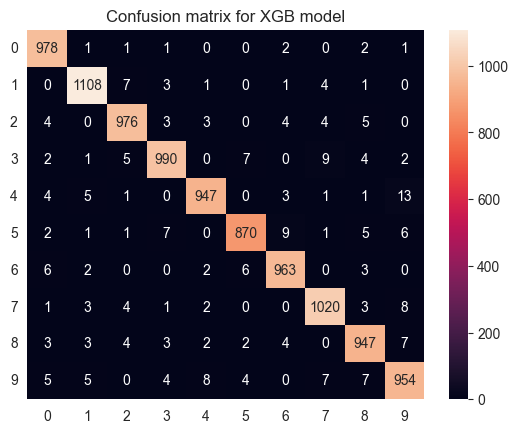

In [150]:
conf_mtrx_xgb = confusion_matrix(y_test, xgb_results[-1])
sns.heatmap(conf_mtrx_xgb,annot=True, fmt=".0f")
plt.title('Confusion matrix for XGB model')
plt.yticks(rotation=0)
plt.show()

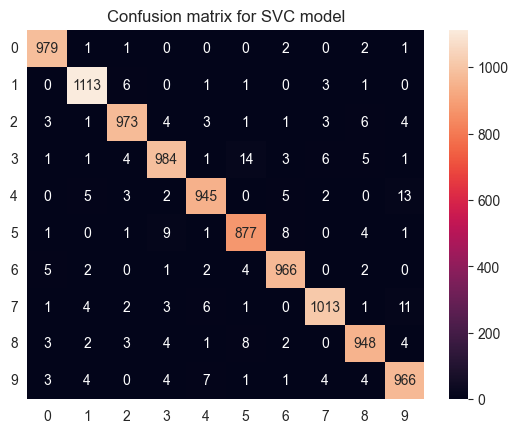

In [271]:
conf_mtrx_svc = confusion_matrix(y_test, svc_results[-1])
sns.heatmap(conf_mtrx_svc,annot=True, fmt=".0f")
plt.title('Confusion matrix for SVC model')
plt.yticks(rotation=0)
plt.show()

__Results of the AutoSklearn model and parameter search fed into the above 'auto_sklearn' VotingClassifier__

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
8            1             0.12           libsvm_svc  0.047879   7.166406
3            2             0.02           libsvm_svc  0.051515   9.410742
4            3             0.14  k_nearest_neighbors  0.052121   1.650846
2            4             0.64        random_forest  0.052727  10.361862
5            5             0.08           libsvm_svc  0.057576   2.281132

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2c57de7910>,
           'cost': 0.052727272727272734,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2c57cadee0>,
           'ensemble_weight': 0.64,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2c57de73d0>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': RandomForestClassifier(max_features=25, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
    3: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2c57ca8df0>,
           'cost': 0.051515151515151514,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2c6cfffbe0>,
           'ensemble_weight': 0.02,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2c57ca88e0>,
           'model_id': 3,
           'rank': 2,
           'sklearn_classifier': SVC(C=21.59109048521139, cache_size=1267.9713541666667, class_weight='balanced',
    gamma=5.060493057005212, max_iter=-1.0, random_state=1, shrinking=False,
    tol=0.00012027336497045934)},
    4: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2c57cb4e50>,
           'cost': 0.052121212121212124,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2c57cad0d0>,
           'ensemble_weight': 0.14,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2c57ccca00>,
           'model_id': 4,
           'rank': 3,
           'sklearn_classifier': KNeighborsClassifier(n_neighbors=4, weights='distance')},
    5: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2c5511da60>,
           'cost': 0.05757575757575761,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2c57fd2550>,
           'ensemble_weight': 0.08,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2c5511d700>,
           'model_id': 5,
           'rank': 4,
           'sklearn_classifier': SVC(C=8776.614453785322, cache_size=1239.6640625, coef0=-0.33548507886436374,
    degree=2, gamma=2.6166845238639262, kernel='poly', max_iter=-1.0,
    random_state=1, shrinking=False, tol=4.6482002538704e-05)},
    8: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2c4824ecd0>,
           'cost': 0.047878787878787854,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2c57f52b50>,
           'ensemble_weight': 0.12,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2c4824ebb0>,
           'model_id': 8,
           'rank': 5,
           'sklearn_classifier': SVC(C=12923.91167672086, cache_size=1239.6901041666667,
    gamma=0.028106748647672205, max_iter=-1.0, random_state=1, shrinking=False,
    tol=2.0706197108771777e-05)}}
'''